### 📱 Will They Buy a Mobile Phone or Not?
###### Machine Learning with Decision Trees

##### Problem Statement:
##### Can we predict whether a customer will buy a mobile phone or not
##### based on features like age, salary, or other attributes?
##### Let’s use a Decision Tree Classifier to find out!

##### Why Decision Trees?
##### Simple. Visual. Interpretable. And just like a good detective —
##### they ask all the right questions to crack the case!


In [17]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [19]:
# Create Sample Dataset
data = {
    'Age': [18, 25, 30, 35, 40, 45, 50, 22, 28, 38, 42, 48, 52, 60, 65],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male',
               'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'EstimatedSalary': [15000, 25000, 30000, 40000, 50000, 35000, 60000,
                        20000, 42000, 38000, 49000, 33000, 58000, 21000, 47000],
    'Purchased': [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1]  # 0 = Not Purchased, 1 = Purchased
}

In [21]:
df = pd.DataFrame(data)
print("Sample Data:")
display(df)

Sample Data:


,Age,Gender,EstimatedSalary,Purchased
0,18,Male,15000,0
1,25,Female,25000,0
2,30,Female,30000,1
3,35,Male,40000,1
4,40,Male,50000,1
5,45,Female,35000,0
6,50,Male,60000,1
7,22,Female,20000,0
8,28,Male,42000,1
9,38,Female,38000,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              15 non-null     int64 
 1   Gender           15 non-null     object
 2   EstimatedSalary  15 non-null     int64 
 3   Purchased        15 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 612.0+ bytes


In [25]:
# Data Preprocessing
df['Gender'] = df['Gender'].map({'Male': 0 , 'Female': 1})

In [33]:
# Feature Selection
X = df[['Age', 'Gender', 'EstimatedSalary']]
y = df['Purchased']

In [29]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Model Training
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
# prediction
y_pred = model.predict(X_test)

In [50]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3333333333333333

 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



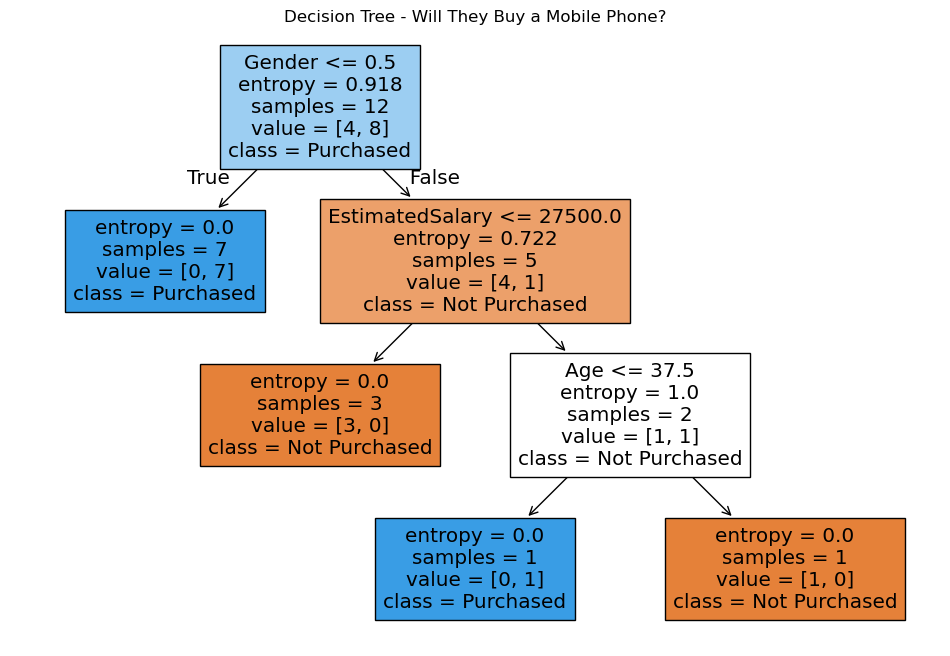

In [52]:
# Visualize Decision Tree
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'])
plt.title("Decision Tree - Will They Buy a Mobile Phone?")
plt.show()